In [35]:
import pandas as pd
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("greenbuildings.csv")
df.head(5)

Populating the interactive namespace from numpy and matplotlib


,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


In [36]:
for i in range(len(df['hd_total07'])):
    if df.loc[i, 'hd_total07'] < 1000:
        df.loc[i, 'hd_total07_quantiles'] = "<1000"
    
    if df.loc[i, 'hd_total07'] >= 1000 and df.loc[i, 'hd_total07'] < 2000:
        df.loc[i, 'hd_total07_quantiles'] = "1000-2000"
    
    if df.loc[i, 'hd_total07'] >= 2000 and df.loc[i, 'hd_total07'] < 3000:
        df.loc[i, 'hd_total07_quantiles'] = "2000-3000"
    
    if df.loc[i, 'hd_total07'] >= 3000 and df.loc[i, 'hd_total07'] < 4000:
        df.loc[i, 'hd_total07_quantiles'] = "3000-4000"
    
    if df.loc[i, 'hd_total07'] >= 4000 and df.loc[i, 'hd_total07'] < 5000:
        df.loc[i, 'hd_total07_quantiles'] = "4000-5000"
    
    if df.loc[i, 'hd_total07'] >= 5000:
        df.loc[i, 'hd_total07_quantiles'] = ">5000"
        

In [37]:
for i in range(len(df['cd_total_07'])):
    if df.loc[i, 'cd_total_07'] < 1000:
        df.loc[i, 'cd_total_07_quantiles'] = "<1000"
    
    if df.loc[i, 'cd_total_07'] >= 1000 and df.loc[i, 'cd_total_07'] < 2000:
        df.loc[i, 'cd_total_07_quantiles'] = "1000-2000"
    
    if df.loc[i, 'cd_total_07'] >= 2000 and df.loc[i, 'cd_total_07'] < 3000:
        df.loc[i, 'cd_total_07_quantiles'] = "2000-3000"
    
    if df.loc[i, 'cd_total_07'] >= 3000 and df.loc[i, 'cd_total_07'] < 4000:
        df.loc[i, 'cd_total_07_quantiles'] = "3000-4000"
    
    if df.loc[i, 'cd_total_07'] >= 4000 and df.loc[i, 'cd_total_07'] < 5000:
        df.loc[i, 'cd_total_07_quantiles'] = "4000-5000"
    
    if df.loc[i, 'cd_total_07'] >= 5000:
        df.loc[i, 'cd_total_07_quantiles'] = ">5000"

In [38]:
df_g = df.groupby(['cd_total_07_quantiles', 'green_rating'])['Rent'].agg('mean')
df_g.reset_index()
df = pd.merge(df,df_g, left_on = ['cd_total_07_quantiles', 'green_rating'] , right_on = ['cd_total_07_quantiles', 'green_rating'])

df_h = df.groupby(['hd_total07_quantiles', 'green_rating'])['Rent_x'].agg('mean')
df_h.reset_index()
df = pd.merge(df,df_h, left_on = ['hd_total07_quantiles', 'green_rating'] , right_on = ['hd_total07_quantiles', 'green_rating'])

# df.to_csv("rentColdDays.csv")

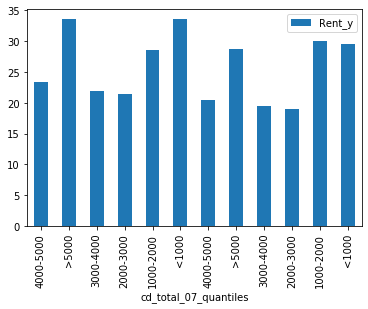

In [44]:
df[[ 'cd_total_07_quantiles', 'Rent_y']].drop_duplicates().set_index('cd_total_07_quantiles').plot(kind = 'bar')

In [53]:
df[[ 'hd_total07_quantiles', 'Rent_x_y']].drop_duplicates().set_index('hd_total07_quantiles')#.plot(kind = 'bar')

,Rent_x_y
hd_total07_quantiles,
<1000,27.394571
1000-2000,32.455549
<1000,23.416327
1000-2000,28.682854
2000-3000,29.277009
3000-4000,34.625238
4000-5000,33.789298
2000-3000,30.991326
3000-4000,37.621192


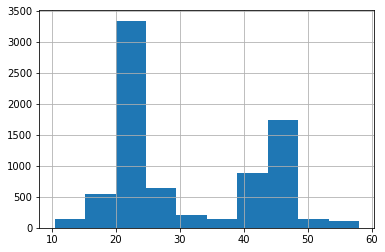

In [54]:
df['Precipitation'].hist()

In [43]:
df.to_csv("rentColdDays.csv")